<a href="https://colab.research.google.com/github/yangchangnaihoby/python/blob/master/Project_001_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 사용할 기본 모듈들 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# seaborn에서 titanic 데이터 불러오기
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


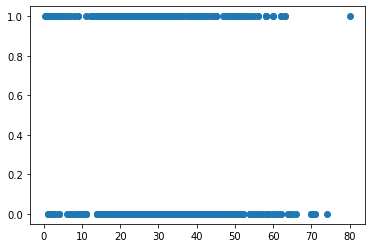

80.0


In [ ]:
# 연속적 데이터인 age에서 outlier값이 있는지 확인
plt.scatter(titanic['age'], titanic['survived'])
plt.show()
print(max(titanic['age'])) # age == 80.0인 데이터가 outlier

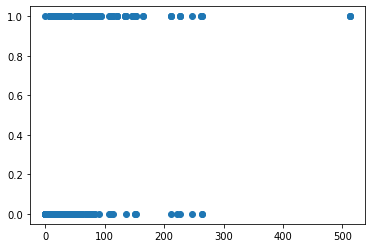

512.3292


In [ ]:
# 연속적 데이터인 fare에서 outlier값이 있는지 확인
plt.scatter(titanic['fare'], titanic['survived'])
plt.show()
print(max(titanic['fare'])) # fare == 512.3292 인 데이터가 outlier

In [ ]:
# 조건을 지정해서 outlier값들을 제외
mask = (titanic.age < 80.0) & (titanic.fare <= 500)
df = titanic.loc[mask, ['sex', 'class', 'survived', 'age', 'fare']]
# NaN데이터를 다른 값으로 채우면 평균이나 예측값에 영향을 주므로 아예 행 삭제
df = df[['sex', 'class', 'survived', 'age', 'fare']].dropna(axis = 0)
print(len(df)) # 남아있는 데이터의 갯수 확인

710


In [ ]:
# age에 NaN데이터가 들어있는지 확인
df['age'].unique()

array([22.  , 38.  , 26.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 70.  , 24.5 ,
        6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
# 범주형 데이터인 sex와 class에 대해 유의미하게 상관관계들이 있는지 표로 비교
pdf = pd.pivot_table(df, index = ['sex'], columns = ['class'], values = ['survived', 'age', 'fare'], aggfunc = 'mean')
pdf

age                              fare                        \
class       First     Second      Third       First     Second      Third   
sex                                                                         
female  34.607143  28.722973  21.750000  103.132193  21.951070  15.875369   
male    41.004286  30.740707  26.507589   62.558801  21.113131  12.162695   

        survived                      
class      First    Second     Third  
sex                                   
female  0.964286  0.918919  0.460784  
male    0.377551  0.151515  0.150198

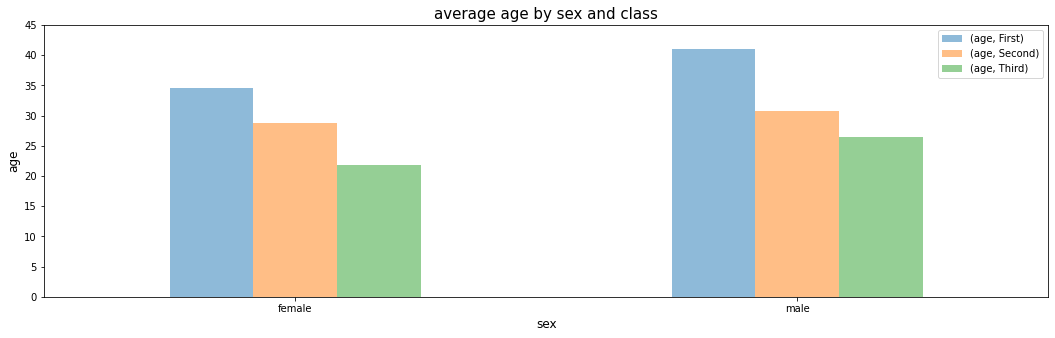

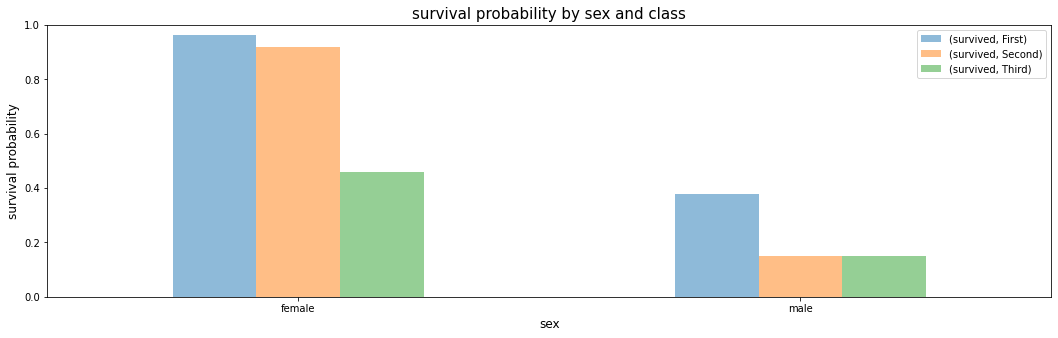

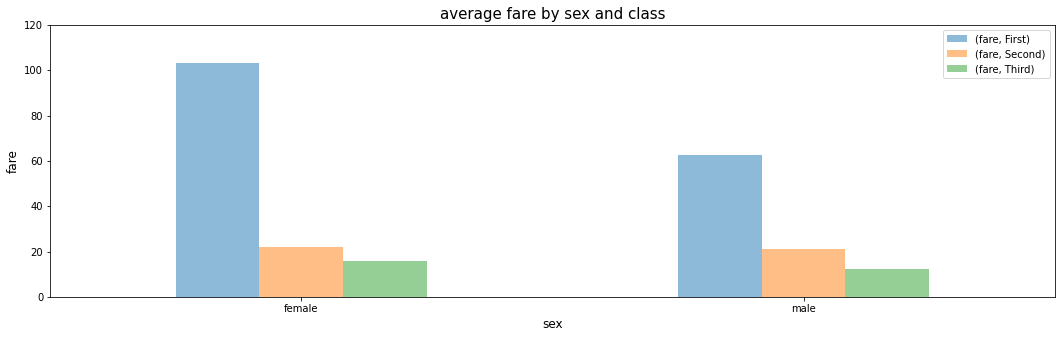

In [ ]:
# sex와 class에 대해 age, survived, fare 데이터가 유의미한 상관관계가 있으므로 bar plot으로 그리기

# sex와 class에 대한 age의 상관관계
pdf1 = pd.pivot_table(df, index = ['sex'], columns = ['class'], values = ['age'], aggfunc = 'mean')

# sex와 class에 대한 survived의 상관관계
pdf2 = pd.pivot_table(df, index = ['sex'], columns = ['class'], values = ['survived'], aggfunc = 'mean')

# sex와 class에 대한 fare의 상관관계
pdf3 = pd.pivot_table(df, index = ['sex'], columns = ['class'], values = ['fare'], aggfunc = 'mean')

# sex와 class에 대한 age의 상관관계 그래프
ax1 = pdf1.plot(kind = 'bar', figsize = (18, 5), alpha = 0.5)
ax1.set_title('average age by sex and class', size = 15)
ax1.set_xlabel('sex', size = 12)
ax1.set_ylabel('age', size = 12)
ax1.set_ylim(0, 45)
ax1.tick_params(axis = 'x', rotation = 0)
ax1.legend()

# sex와 class에 대한 survived의 상관관계 그래프
ax2 = pdf2.plot(kind = 'bar', figsize = (18, 5), alpha = 0.5)
ax2.set_title('survival probability by sex and class', size = 15)
ax2.set_xlabel('sex', size = 12)
ax2.set_ylabel('survival probability', size = 12)
ax2.set_ylim(0, 1)
ax2.tick_params(axis = 'x', rotation = 0)
ax2.legend()

# sex와 class에 대한 fare의 상관관계 그래프
ax3 = pdf3.plot(kind = 'bar', figsize = (18, 5), alpha = 0.5)
ax3.set_title('average fare by sex and class', size = 15)
ax3.set_xlabel('sex', size = 12)
ax3.set_ylabel('fare', size = 12)
ax3.set_ylim(0, 120)
ax3.tick_params(axis = 'x', rotation = 0)
ax3.legend()

plt.show()

# class가 높을수록 age나 fare가 높은건 사실 당연하다고 판단
# 사회적으로 나이가 높을수록, 요금이 비쌀수록 class가 높을 것이기 때문
# 따라서 target 값을 생존율과 관련지으면 유의미한 결론을 도출할 것이라 판단

In [ ]:
# DecisionTree를 사용하기 위해 데이터를 정수형으로 변환하여 전처리
df['sex'].replace({'male' : 1, 'female' : 2}, inplace = True)
df['class'].replace({'Third' : 3, 'Second' : 2, 'First' : 1}, inplace = True)

In [ ]:
# Numpy array로 데이터 형변환
data = df[['sex', 'class', 'age', 'fare']].to_numpy()
target = df['survived'].to_numpy()

In [ ]:
print(data)

[[ 1.      3.     22.      7.25  ]
 [ 2.      1.     38.     71.2833]
 [ 2.      3.     26.      7.925 ]
 ...
 [ 2.      1.     19.     30.    ]
 [ 1.      1.     26.     30.    ]
 [ 1.      3.     32.      7.75  ]]


In [ ]:
print(target)

[0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0
 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0
 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1
 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1
 0 0 1 0 0 1 0 0 1 1 0 0 

In [ ]:
# train 그룹과 test 그룹으로 데이터 분할
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)

In [ ]:
# 서로 다른 기준의 간섭을 방지하기 위해 정규분포로 scaling
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input) # train 데이터 scaling
test_scaled = ss.transform(test_input)   # test 데이터 scaling

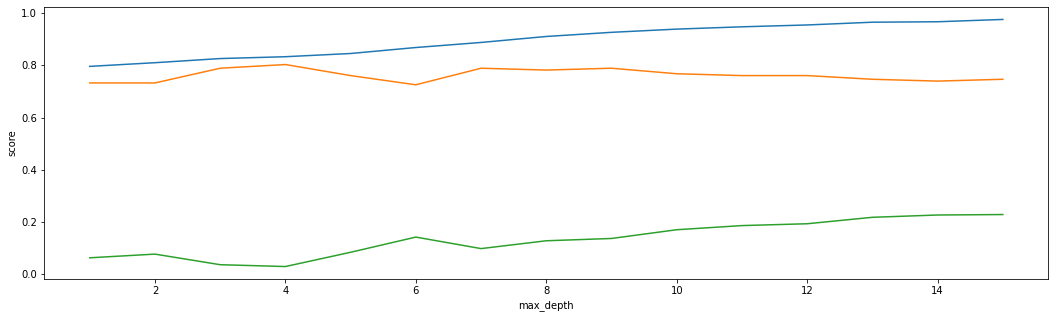

In [ ]:
# 선형분류나 로지스틱 회귀의 경우 연속적 데이터에 대한 예측값은 도출하는 데에 유의미하지만
# 범주형 데이터인 sex나 class에 대해 예측하는 데에는 결정트리가 더 효과적임
# DecisionTree에서의 최적화된 depth를 찾기 위해 train score와 test score의 그래프를 max depth에 따라 그래프화
from sklearn.tree import DecisionTreeClassifier

list_train = []              # train 점수들을 넣기 위한 빈 리스트
list_test = []               # test 점수들을 넣기 위한 빈 리스트
list_train_test = []         # 두 점수의 차이를 비교하기 위한 빈 리스트
list_md = range(1, 15 + 1)   # 그래프로 그릴 max depth(1 ~ 15)의 리스트

# max depth를 1부터 15까지 실행해서 각각의 빈 리스트에 점수값들 저장
for i in range(1, 15 + 1) :
    dt = DecisionTreeClassifier(max_depth = i)
    dt.fit(train_scaled, train_target)                        # 각각의 max depth에 대해 학습
    list_train.append(dt.score(train_scaled, train_target))   # 각각의 경우에 대해 train 리스트에 추가
    list_test.append(dt.score(test_scaled, test_target))      # 각각의 경우에 대해 test 리스트에 추가
    list_train_test.append(dt.score(train_scaled, train_target) - dt.score(test_scaled, test_target)) 

# 시각화
plt.figure(figsize = (18, 5))
plt.plot(list_md, list_train)
plt.plot(list_md, list_test)
plt.plot(list_md, list_train_test)
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

In [ ]:
print(list_test.index(max(list_test)))               # test score가 가장 높은 경우는 max depth가 4일 때
print(list_train_test.index(min(list_train_test)))   # train score와 test score의 차이가 가장 적은 경우는 max depth가 4일 때

3
3


In [ ]:
# test score가 가장 높고 train score와 test score의 차이가 가장 적은 경우는 max depth가 4일 때
# max depth가 4일 때 가장 최적화된 분류 모델이라고 판단하여 max depth를 4로 지정
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(train_scaled, train_target)  # max depth == 4 에서 학습
print(dt.feature_importances_)      # 특성들의 중요도를 파악
# train score와 test score 확인
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

[0.62018569 0.19008965 0.12761182 0.06211284]
0.8327464788732394
0.8028169014084507


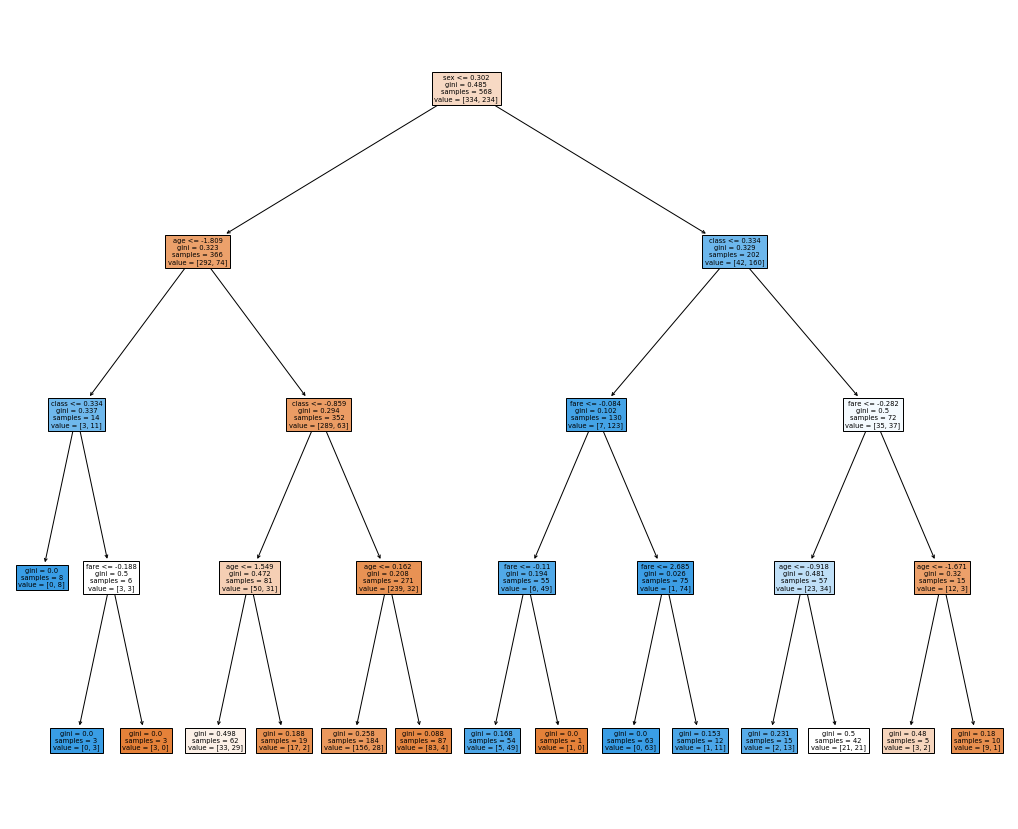

In [ ]:
# 결정트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize = (18, 15))
plot_tree(dt, filled = True, feature_names = ['sex', 'class', 'age', 'fare'])
plt.show()

In [ ]:
# 2번째 방법 : 최저 불순도 감소를 지정하여 max depth없이 결정트리 학습
dt_2 = DecisionTreeClassifier(min_impurity_decrease = 0.0005)
dt_2.fit(train_scaled, train_target)
print(dt_2.score(train_scaled, train_target))
print(dt_2.score(test_scaled, test_target))

0.9700704225352113
0.7535211267605634


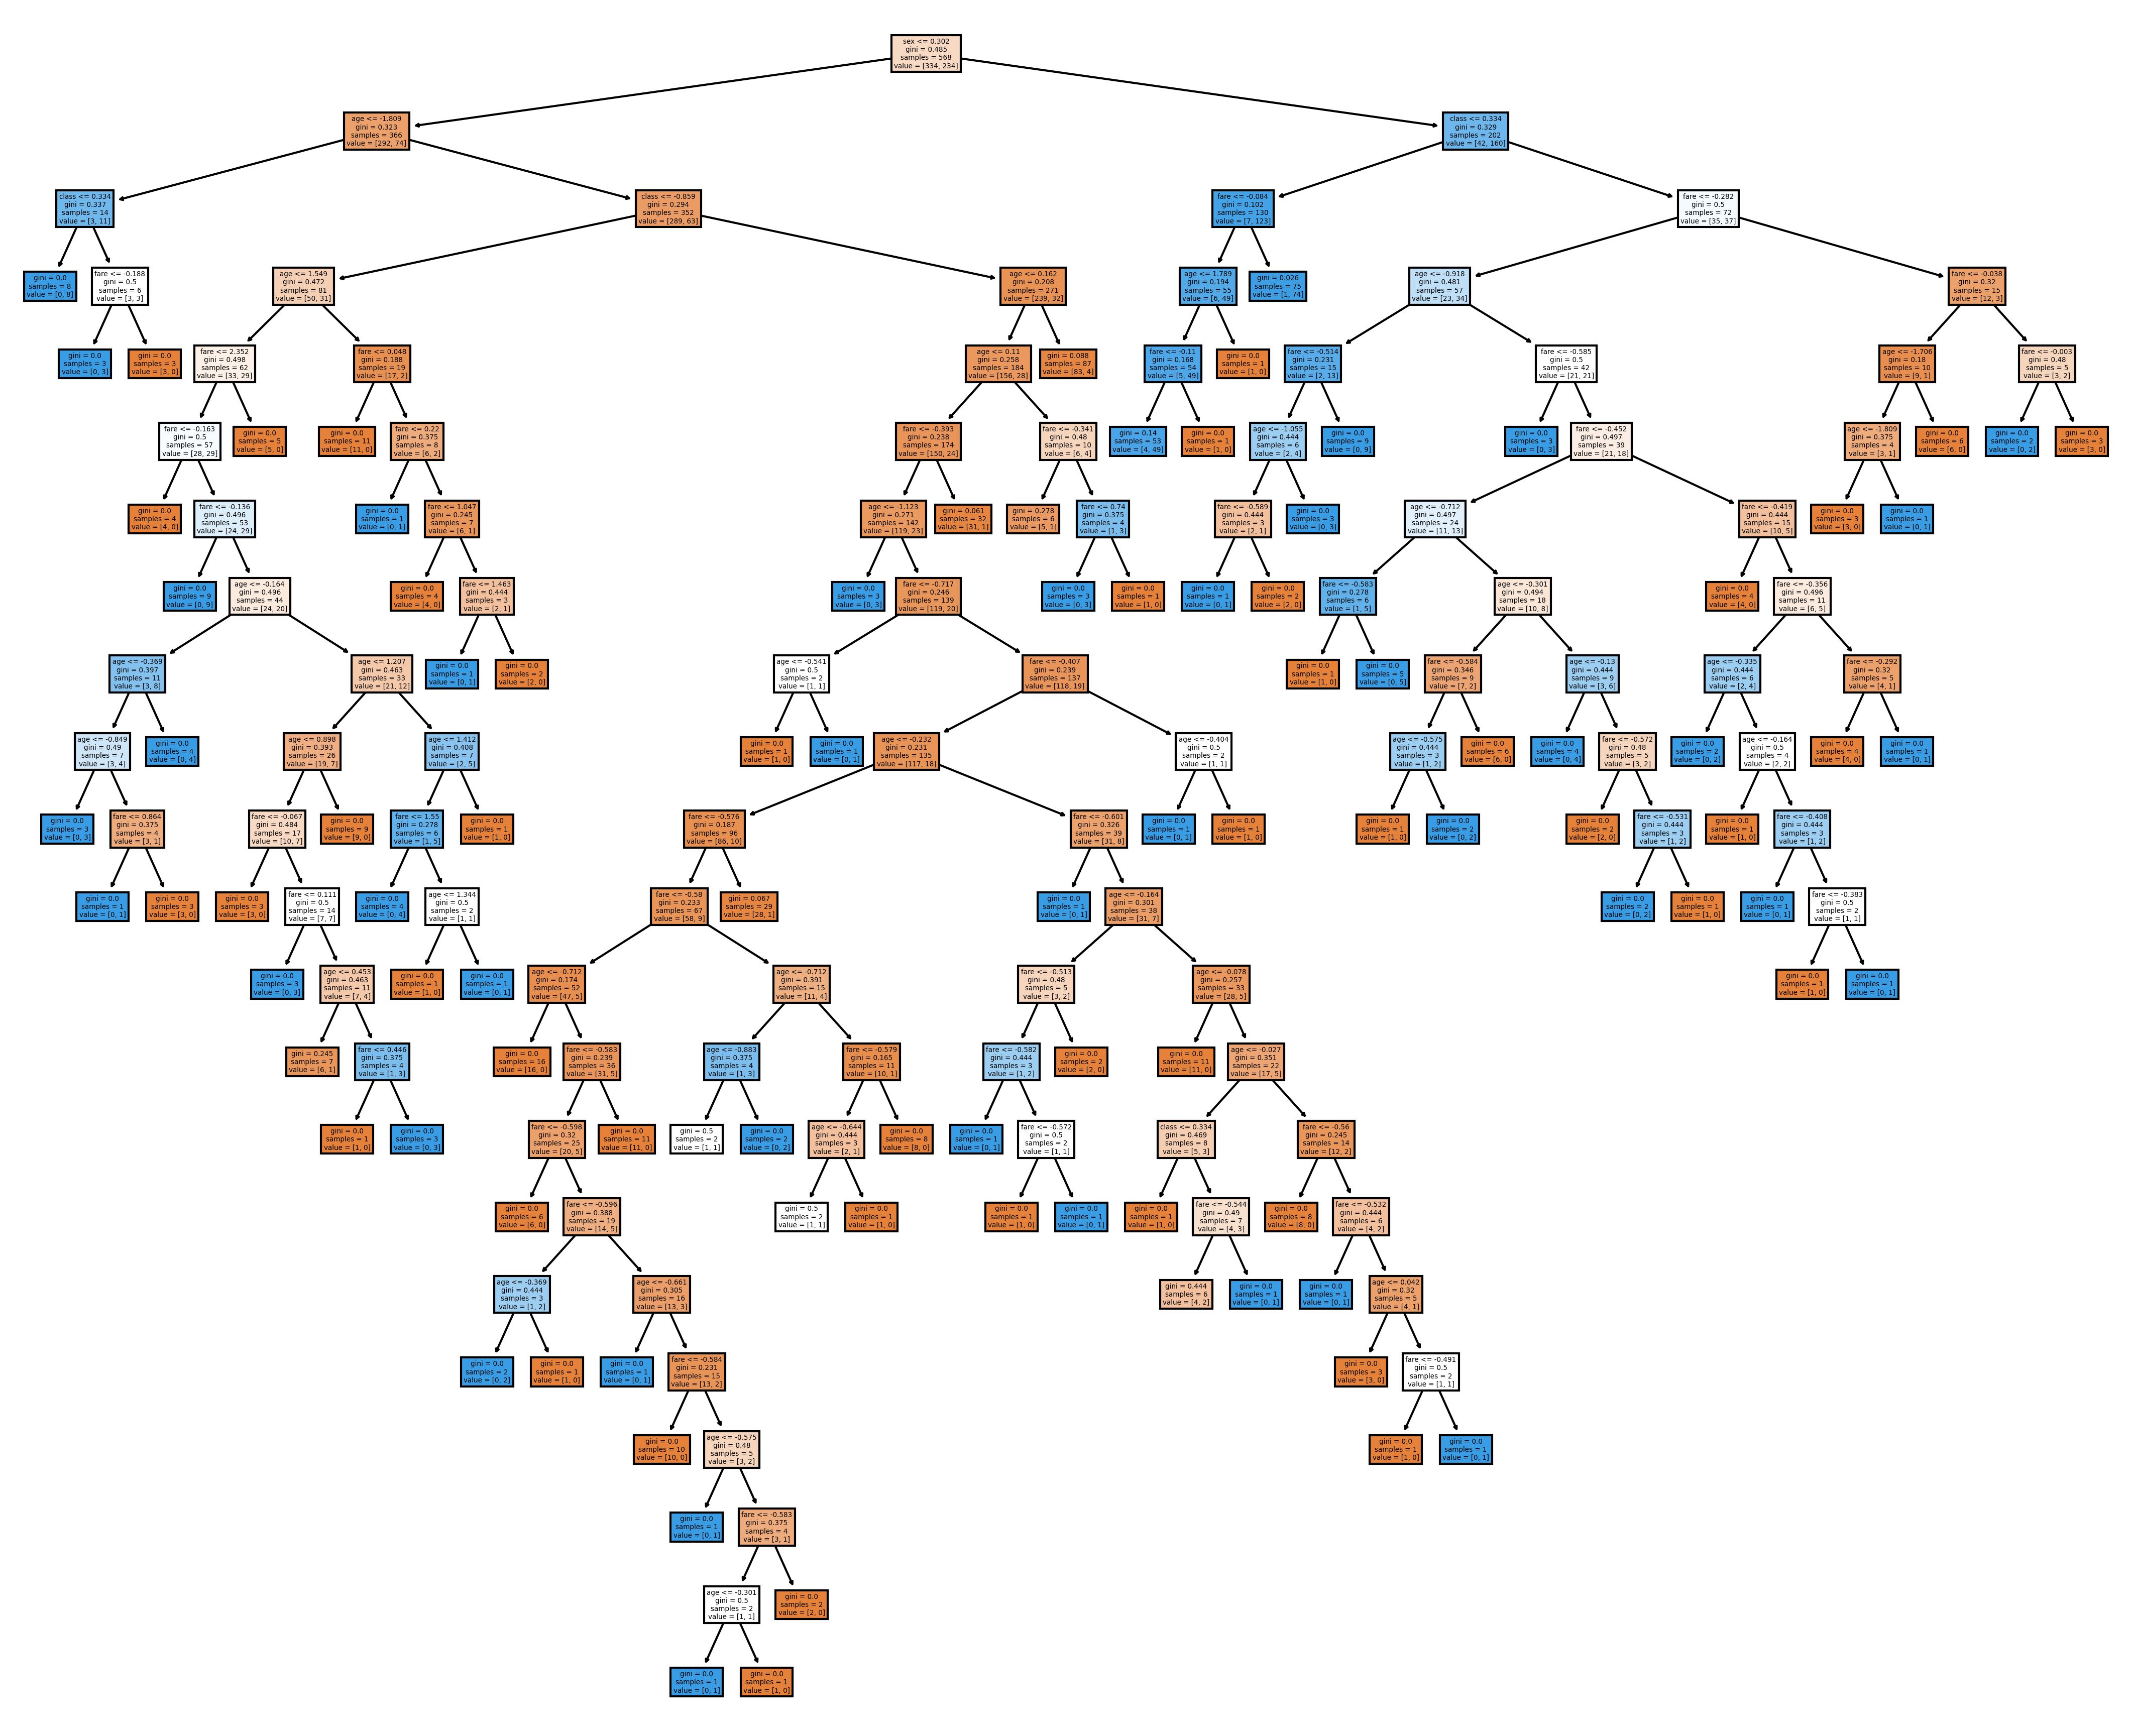

In [ ]:
# 시각화
plt.figure(figsize = (18, 15), dpi = 300)
plot_tree(dt_2, filled = True, feature_names = ['sex', 'class', 'age', 'fare'])
plt.show()

In [ ]:
# 3번째 방법 : 랜덤포레스트로 학습
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs = -1)
rf.fit(train_input, train_target)
print(rf.feature_importances_)
print(rf.score(train_input, train_target))
print(rf.score(test_input, test_target))

[0.29940236 0.09525209 0.30398409 0.30136146]
0.9894366197183099
0.7746478873239436
